In [106]:
import pandas as pd
listings = pd.read_csv("Listings.csv" , encoding = "ISO-8859-1" , low_memory = False )


In [107]:
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [108]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

In [109]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [110]:
# paris_listings = listings.query("city == 'Paris'")

In [111]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[: , ["host_since" , "neighbourhood" , "city" , "accommodates" , "price"]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [112]:
paris_listings.isna()

,host_since,neighbourhood,city,accommodates,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
279707,False,False,False,False,False
279708,False,False,False,False,False
279709,False,False,False,False,False
279710,False,False,False,False,False


In [113]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [114]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [115]:
paris_listings.query("accommodates == 0").count() #its not much data so we can ignore it in the analysis not even 1 percent

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [116]:
paris_listings.query("price == 0 and accommodates == 0 and city == 0").count() #its not much data so we can ignore it in the analysis not even 1 percent

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

# Objective 2
here we will prepare the data for visualization 
 Task 1------------------------------------
<!-- Create a table named Paris_listings_beighbourhood  tharr groups paris listings by neighboiurhood and calculated the mean price ( low to high )-->

In [117]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
)

In [118]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


# task 2
<!-- create table names paris_listings_accomodation filter down the most expensive neighbourhood , group by the "accommodation" coloumn and add the mean price for each value of "accommodates" ( sorted low to high ) -->

In [119]:
paris_listings_accomodation = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean" })
    .sort_values("price")
)

In [120]:
paris_listings_accomodation.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


# task 3
<!-- create table called paris_listings_over_time grouped by the "host_since" year and calculate the avg price and count of rows representing the number of new hosts -->

In [121]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since") #since we are using date column so we will change the index to date column
    .resample("YE") # we are reorderign the data according to the year
    .agg({
        "neighbourhood" : "count" ,
        "price" : "mean"
    })
)

In [122]:
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# objective 3 : visualize the data
<!-- Task 1 -->
create horizontal bar chart of the avg price by beighbourhood in Paris make sure to add a title and change axis label as needed



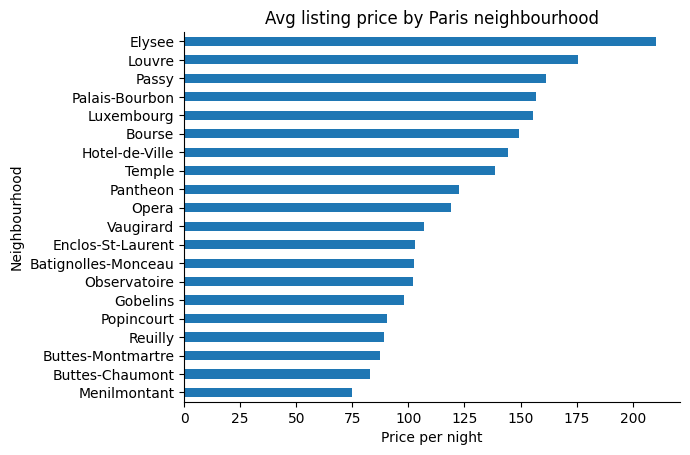

In [123]:
import seaborn as sbn
(
 paris_listings_neighbourhood
.plot
.barh(
    title = "Avg listing price by Paris neighbourhood" ,
    xlabel = "Price per night",
    ylabel = "Neighbourhood",
    legend = None
)
)
sbn.despine()

# Task2
create a horizontal bar chart of the avg price by "accommodation" in Paris most expensive neighbourhood . Make sure to add a title and change axos labels as needed.

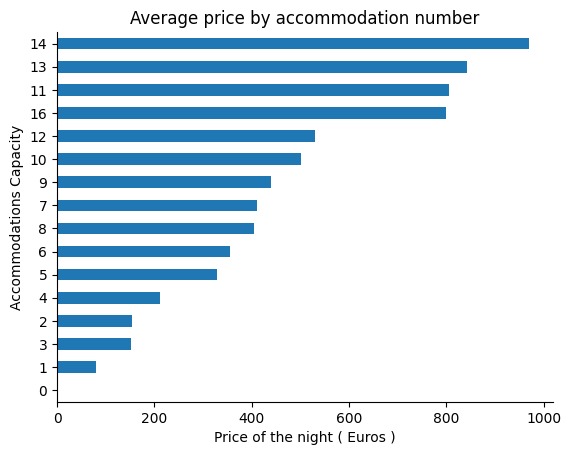

In [124]:
import seaborn as sns
(
    paris_listings_accomodation
    .plot
    .barh(
        title= "Average price by accommodation number",
        xlabel= "Price of the night ( Euros )" ,
        ylabel = "Accommodations Capacity",
        legend = None
    )
)
sns.despine()

# Task 3
Create 2 line charts:
<!-- One of the count of the new hosts over time and one for the avg price , make sure to set the Y axis limit to zero , add a title , and change axis labels as needed -->



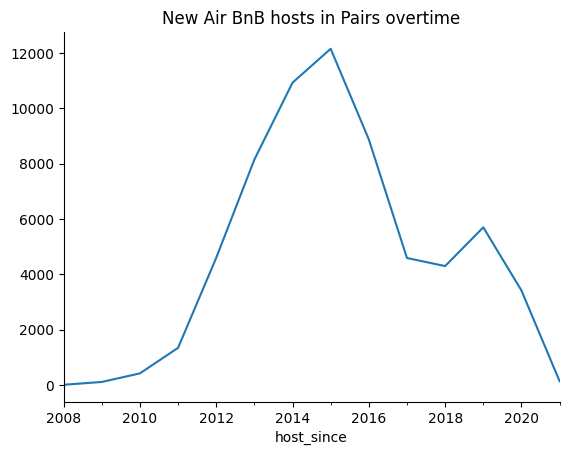

In [125]:
paris_listings_over_time["neighbourhood"].plot(
    label = "New Hosts",
    title="New Air BnB hosts in Pairs overtime"
)

sns.despine()

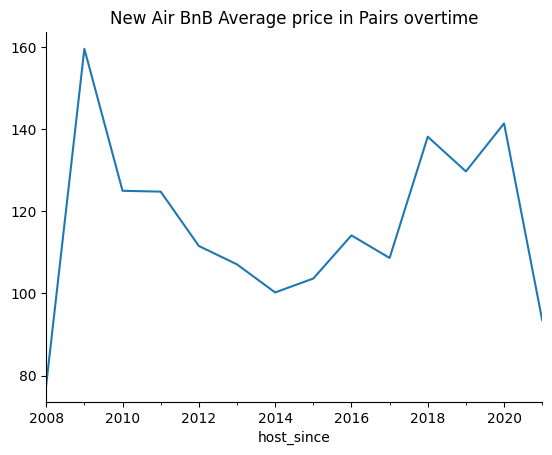

In [126]:
paris_listings_over_time["price"].plot(
    label = "Average Price (Euros)",
    title="New Air BnB Average price in Pairs overtime"
)

sns.despine()

# Challenge
Create a dual axis line chart that contains both new hosts and avg price over time

Text(0.5, 1.0, '2015 Regulations lead to fewer hosts and higher prices')

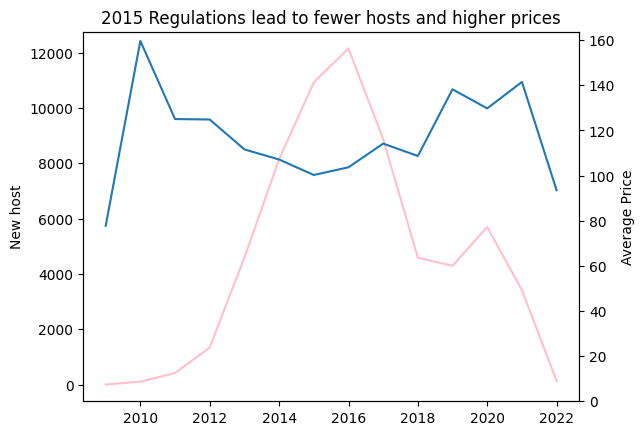

In [127]:
import matplotlib.pyplot as plt 
fig , ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"] ,
    label = "New hosts",
    c = "pink"
)

ax.set_ylabel("New host")

ax2 = ax.twinx() # used to create chart on the chart 
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"] ,
    label = "Average Price",
    # c = "pink"
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("2015 Regulations lead to fewer hosts and higher prices")
